In [1]:
import pandas as pd
from sklearn.decomposition import PCA, FastICA
import numpy as np
from matplotlib import pyplot as plt

In [3]:
parsed_data = pd.read_pickle("output_df.pkl")

In [4]:
parsed_data

,behavior,neural,targetPosition,trialNumber
0,"[[0.5153846, 0.4724014, 0.0, -0.0011111498, 0....","[[9.75, 23.75, 14.333333333333334, 11.44444444...","[0.2, 0.8]",3
1,"[[0.50747865, 0.49677426, 0.00021368265, 2.980...","[[12.083333333333334, 22.77777777777778, 11.19...","[0.2, 0.8]",13
2,"[[0.5442308, 0.4548387, -0.00057691336, 0.0, 0...","[[11.775, 29.125, 17.15, 13.725, 6.75, 7.675, ...","[0.2, 0.8]",45
3,"[[0.47653842, 0.5017742, 0.00038462877, -0.000...","[[11.15, 25.65, 15.2, 14.675, 7.6, 5.375, 14.5...","[0.2, 0.8]",55
4,"[[0.46132475, 0.48028672, -0.00017094612, -0.0...","[[9.194444444444445, 24.47222222222222, 14.166...","[0.2, 0.8]",57
...,...,...,...,...
188,"[[0.48076922, 0.4937097, 0.0, -0.00016131997, ...","[[10.025, 24.95, 10.05, 11.875, 6.675, 8.55, 1...","[0.8, 0.2]",1456
189,"[[0.46111107, 0.503405, 0.0004273355, -0.00017...","[[10.36111111111111, 20.166666666666668, 9.0, ...","[0.8, 0.2]",1464
190,"[[0.5307693, 0.5196774, -0.00096154213, -0.000...","[[8.975, 18.375, 11.8, 9.7, 5.225, 6.575, 11.9...","[0.8, 0.2]",1492
191,"[[0.540171, 0.5410395, 0.000790596, -0.0008780...","[[8.972222222222221, 22.77777777777778, 12.138...","[0.8, 0.2]",1504


In [5]:
reachpositions_interested = [
    np.array([0.2, 0.8]),
    np.array([0.8, 0.2])
]

In [6]:
from tqdm import tqdm
arr = pd.DataFrame(columns=["neural", "targetPosition"])

counter = 0
pca_split_index = 0
row_count = 0


for row in tqdm(parsed_data.iterrows()):
    if row[1]["targetPosition"][0] == np.float32(0.8):
        pca_split_index = counter
    else:
        row_count += 1
    for i in row[1]["neural"]:
        
        # build df for each neural, with the reach positions
        
        append_tuple = (i, row[1]["targetPosition"])
    
        arr = arr.append(pd.DataFrame([append_tuple], columns=["neural", "targetPosition"]))
        
        if pca_split_index == 0:
            counter = counter + 1

#flatten_arr = np.array(arr)


print(arr.shape)

print(pca_split_index)

print(row_count)

193it [00:10, 18.87it/s]

(13855, 2)
7922
111


In [7]:
arr

,neural,targetPosition
0,"[9.75, 23.75, 14.333333333333334, 11.444444444...","[0.2, 0.8]"
0,"[12.1, 10.275, 17.425, 14.95, 8.05, 6.8, 21.55...","[0.2, 0.8]"
0,"[10.45, 10.575, 16.15, 15.25, 7.55, 9.075, 21....","[0.2, 0.8]"
0,"[13.121951219512194, 9.048780487804878, 14.195...","[0.2, 0.8]"
0,"[11.325, 19.675, 18.325, 14.35, 6.375, 6.825, ...","[0.2, 0.8]"
...,...,...
0,"[7.7, 11.8, 11.6, 12.35, 5.05, 6.7, 10.975, 9....","[0.8, 0.2]"
0,"[13.325, 11.35, 10.175, 9.475, 6.325, 7.525, 1...","[0.8, 0.2]"
0,"[10.45, 12.65, 8.525, 10.525, 6.9, 6.75, 10.85...","[0.8, 0.2]"
0,"[10.829268292682928, 11.951219512195122, 12.43...","[0.8, 0.2]"


In [149]:
# data_split_idx = 7922 # set to final_count

Run the following cell

In [8]:
neural_data = np.array(arr["neural"].tolist())

neural_data.shape

for i in range(96):
    arr[str(i)] = neural_data[:, i]
    
    
arr["targetPosition"] = arr["targetPosition"].apply(lambda x: False if x[0] == np.float32(0.2) else True)

In [9]:
pca = PCA(n_components=3)
input_pca = pca.fit_transform(np.array(arr["neural"].tolist()))
print(input_pca.shape)

# convert to dataframe
input_pca_df = pd.DataFrame(input_pca, columns=["PCA1", "PCA2", "PCA3"])

# append the target position to the PCA dataframe
input_pca_df["targetPosition"] = arr["targetPosition"].tolist()

input_pca_df


(13855, 3)


,PCA1,PCA2,PCA3,targetPosition
0,-3.566460,-7.440762,16.849151,False
1,6.648580,-5.934545,-1.920439,False
2,2.207256,-2.150254,-3.300928,False
3,5.445565,4.956680,-6.197654,False
4,2.678053,-15.860230,10.045943,False
...,...,...,...,...
13850,-6.385717,8.822207,0.046750,True
13851,-6.169122,4.666888,-2.209190,True
13852,-13.571337,0.046081,3.735578,True
13853,-0.774631,14.465791,0.174493,True


In [11]:
# split the data into two df for the two target positions (0.2, 0.8) and (0.8, 0.2)
input_pca_df_1 = input_pca_df[input_pca_df["targetPosition"].apply(lambda x: not x)]
input_pca_df_2 = input_pca_df[input_pca_df["targetPosition"].apply(lambda x: x )]


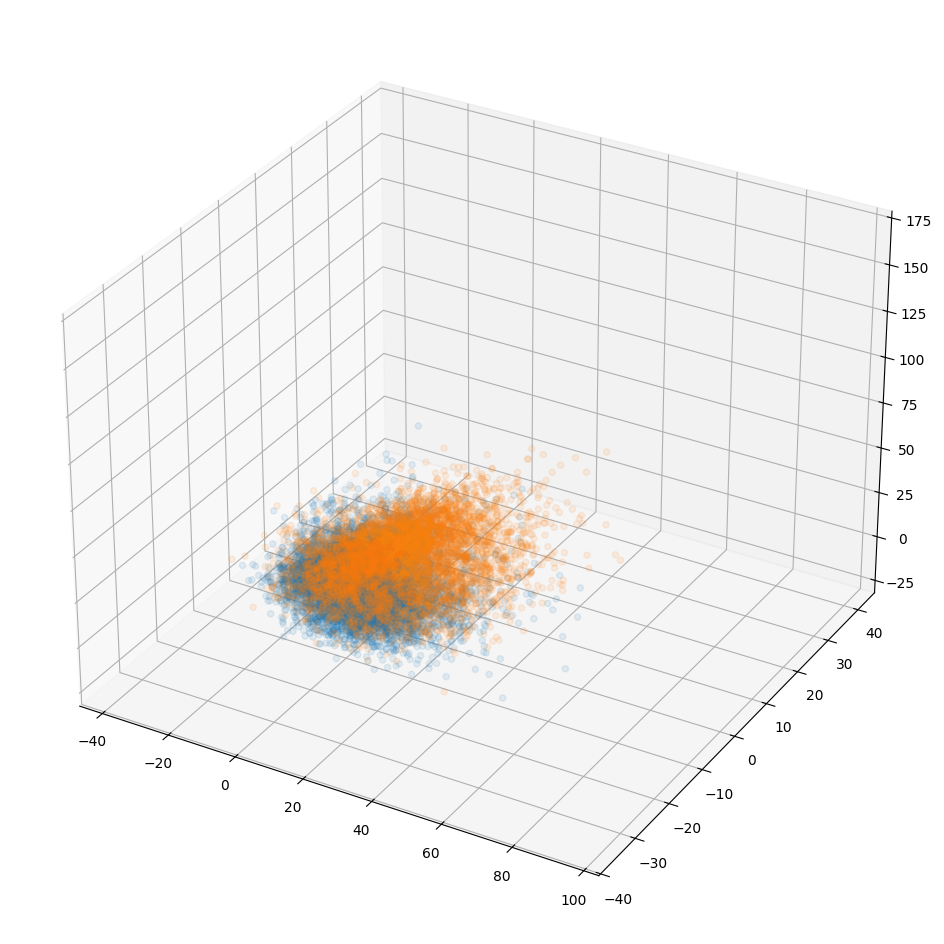

In [12]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(input_pca_df_1["PCA1"], input_pca_df_1["PCA2"], input_pca_df_1["PCA3"], alpha=0.1)
ax.scatter(input_pca_df_2["PCA1"], input_pca_df_2["PCA2"], input_pca_df_2["PCA3"], alpha=0.1)

plt.show()

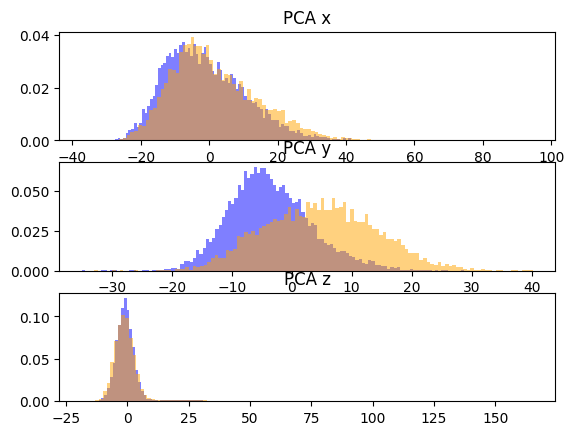

In [17]:
fig, ax = plt.subplots(3)

ax[0].hist(input_pca_df_1["PCA1"], density=True, bins=120, color="Blue", alpha=0.5)
ax[0].hist(input_pca_df_2["PCA1"], density=True, bins=120, color="Orange", alpha=0.5)

ax[1].hist(input_pca_df_1["PCA2"], density=True, bins=120, color="Blue", alpha=0.5)
ax[1].hist(input_pca_df_2["PCA2"], density=True, bins=120, color="Orange", alpha=0.5)

ax[2].hist(input_pca_df_1["PCA3"], density=True, bins=120, color="Blue", alpha=0.5)
ax[2].hist(input_pca_df_2["PCA3"], density=True, bins=120, color="Orange", alpha=0.5)

# title
ax[0].set_title("PCA x")
ax[1].set_title("PCA y")
ax[2].set_title("PCA z")

plt.show()


In [14]:
pca = PCA(n_components=3)
input_pca = pca.fit_transform(np.array(arr["neural"].tolist()))
print(input_pca.shape)

# convert to dataframe
input_pca_df = pd.DataFrame(input_pca, columns=["PCA1", "PCA2", "PCA3"])

# append the target position to the PCA dataframe
input_pca_df["targetPosition"] = arr["targetPosition"].tolist()

# split the data into two df for the two target positions (0.2, 0.8) and (0.8, 0.2)
input_pca_df_1 = input_pca_df[input_pca_df["targetPosition"].apply(lambda x: not x)]
input_pca_df_2 = input_pca_df[input_pca_df["targetPosition"].apply(lambda x: x )]


(13855, 3)


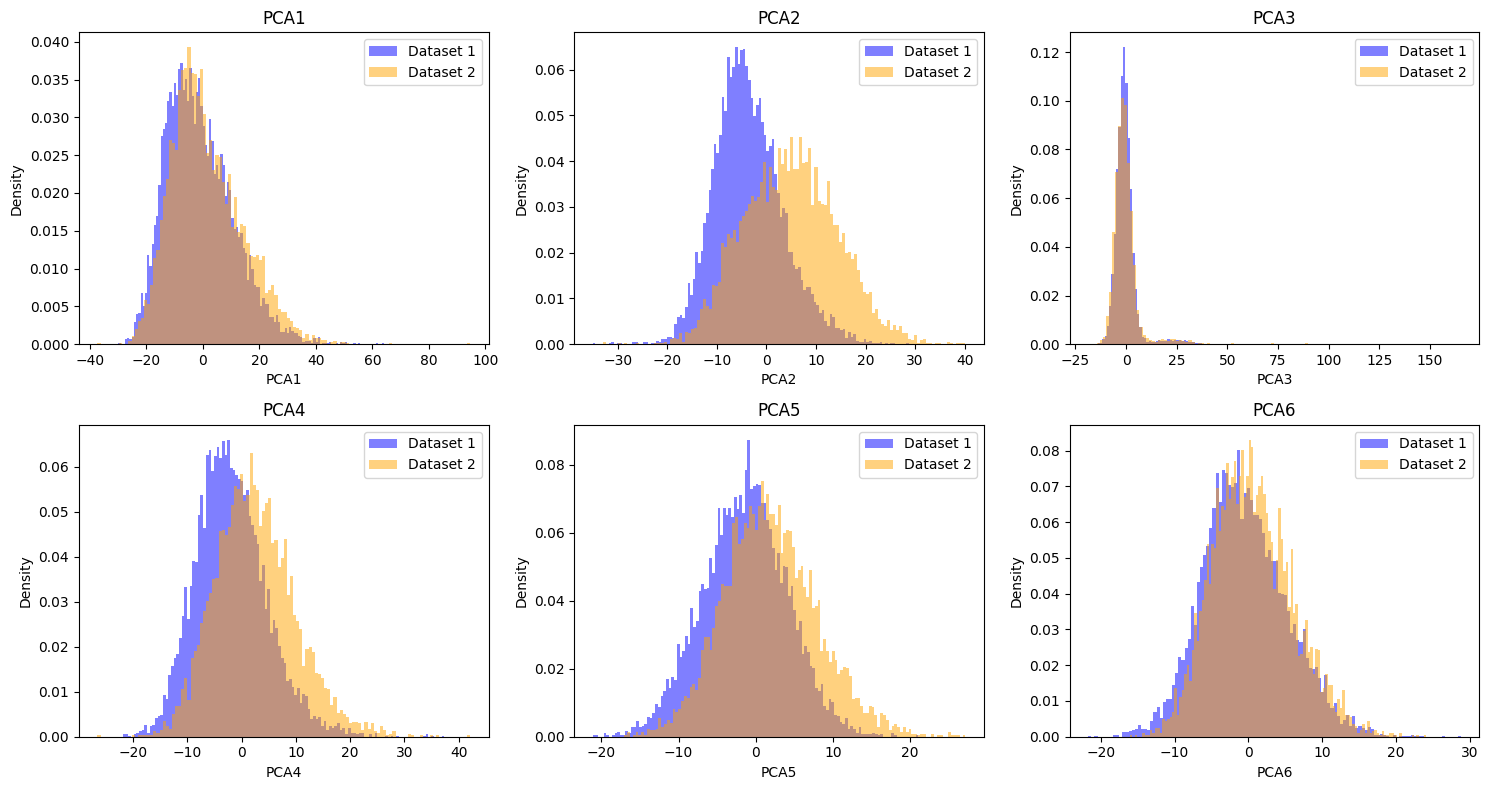

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import math

def automate_pca_and_plot(arr, n_components=3):
    pca = PCA(n_components=n_components)
    input_pca = pca.fit_transform(np.array(arr["neural"].tolist()))
    
    pca_columns = [f"PCA{i+1}" for i in range(n_components)]
    input_pca_df = pd.DataFrame(input_pca, columns=pca_columns)
    
    input_pca_df["targetPosition"] = arr["targetPosition"].tolist()

    input_pca_df_1 = input_pca_df[input_pca_df["targetPosition"].apply(lambda x: not x)]
    input_pca_df_2 = input_pca_df[input_pca_df["targetPosition"].apply(lambda x: x )]

    plot_pca_histograms_multiple(input_pca_df_1, input_pca_df_2, n_components)

def plot_pca_histograms_multiple(input_pca_df_1, input_pca_df_2, n_components=3, wrap_after=3):
    n_rows = math.ceil(n_components / wrap_after)
    n_cols = min(n_components, wrap_after)

    fig, ax = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
    ax = ax.flatten()

    for i in range(n_components):
        component = f"PCA{i+1}"
        
        ax[i].hist(input_pca_df_1[component], density=True, bins=120, color="Blue", alpha=0.5, label='Dataset 1')
        ax[i].hist(input_pca_df_2[component], density=True, bins=120, color="Orange", alpha=0.5, label='Dataset 2')
        
        ax[i].set_title(f"{component}")
        ax[i].set_xlabel(component)
        ax[i].set_ylabel("Density")
        ax[i].legend()

    for j in range(n_components, n_rows * n_cols):
        fig.delaxes(ax[j])

    plt.tight_layout()
    plt.show()
    

automate_pca_and_plot(arr, n_components=6)


In [58]:
# convert target position to 0 and 1
target_position = np.array(arr["targetPosition"].tolist())
target_position = target_position[:, 0]
target_position = target_position == 0.8
print(target_position)


# put that into the df
input_pca_df["targetPosition"] = target_position


[False False False ...  True  True  True]


In [59]:
input_pca_df

,PCA1,PCA2,PCA3,targetPosition
0,-3.566460,-7.440762,16.849151,False
1,6.648580,-5.934545,-1.920439,False
2,2.207256,-2.150254,-3.300928,False
3,5.445565,4.956680,-6.197654,False
4,2.678053,-15.860230,10.045943,False
...,...,...,...,...
13850,-6.385717,8.822207,0.046750,True
13851,-6.169122,4.666888,-2.209190,True
13852,-13.571337,0.046081,3.735578,True
13853,-0.774631,14.465791,0.174493,True


In [117]:
input_pca_df

,PCA1,PCA2,PCA3,targetPosition
0,-3.566460,-7.440762,16.849151,False
1,6.648580,-5.934545,-1.920439,False
2,2.207256,-2.150254,-3.300928,False
3,5.445565,4.956680,-6.197654,False
4,2.678053,-15.860230,10.045943,False
...,...,...,...,...
13850,-6.385717,8.822207,0.046750,True
13851,-6.169122,4.666888,-2.209190,True
13852,-13.571337,0.046081,3.735578,True
13853,-0.774631,14.465791,0.174493,True


In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    input_pca_df[["PCA1", "PCA2", "PCA3"]], input_pca_df["targetPosition"], test_size=0.25
)

In [126]:
from sklearn.mixture import GaussianMixture

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score




gmm = GaussianMixture(n_components=3, random_state=10)

gmm.fit(X_train)

y_pred = gmm.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.1836027713625866


In [128]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7240184757505773


In [168]:
y_train

12055     True
9831      True
5794     False
3903     False
1763     False
         ...  
3373     False
11164     True
4872     False
4341     False
10731     True
Name: targetPosition, Length: 10391, dtype: bool

## Use the scripts at the top of the page to generate the arr
The arr cannot also be used with the histogram method.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score


In [13]:
copy_arr = arr.copy()

target_position = np.array(copy_arr["targetPosition"].tolist())

neural_data = copy_arr.drop(columns=["targetPosition"])


In [14]:
neural_data.drop(columns=["neural"], inplace=True)

In [15]:
neural_data

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,9.750000,23.750000,14.333333,11.444444,5.722222,6.944444,21.000000,11.138889,12.555556,8.750000,...,13.944444,10.111111,9.277778,26.972222,23.222222,13.611111,5.888889,13.277778,25.305556,10.750000
0,12.100000,10.275000,17.425000,14.950000,8.050000,6.800000,21.550000,11.850000,11.325000,9.100000,...,14.850000,9.125000,7.775000,29.325000,27.050000,18.625000,8.400000,13.575000,12.200000,8.775000
0,10.450000,10.575000,16.150000,15.250000,7.550000,9.075000,21.325000,8.400000,9.875000,7.800000,...,19.025000,7.325000,8.600000,28.900000,23.200000,14.475000,8.675000,11.800000,11.975000,9.300000
0,13.121951,9.048780,14.195122,14.000000,8.121951,8.048780,22.512195,13.902439,11.975610,9.292683,...,19.121951,8.365854,8.024390,27.268293,19.365854,14.780488,9.365854,13.926829,11.097561,8.853659
0,11.325000,19.675000,18.325000,14.350000,6.375000,6.825000,18.650000,9.800000,9.475000,6.225000,...,17.125000,11.600000,9.300000,28.525000,26.125000,15.925000,7.450000,10.900000,21.375000,13.225000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,7.700000,11.800000,11.600000,12.350000,5.050000,6.700000,10.975000,9.525000,8.700000,8.475000,...,14.100000,9.125000,10.575000,26.975000,28.800000,17.325000,8.050000,11.600000,12.725000,9.925000
0,13.325000,11.350000,10.175000,9.475000,6.325000,7.525000,12.275000,7.400000,7.475000,8.825000,...,15.200000,7.475000,8.825000,30.975000,18.075000,14.550000,8.125000,11.025000,13.050000,6.400000
0,10.450000,12.650000,8.525000,10.525000,6.900000,6.750000,10.850000,7.900000,9.025000,8.500000,...,20.850000,8.675000,10.500000,27.625000,16.875000,11.850000,8.075000,8.325000,15.900000,8.650000
0,10.829268,11.951220,12.439024,11.951220,7.243902,7.073171,15.121951,7.560976,8.975610,9.317073,...,13.878049,7.902439,10.317073,25.902439,20.268293,16.243902,6.609756,12.609756,11.536585,10.243902


In [21]:
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    neural_data, target_position,
    test_size=0.25
)

In [22]:
y_train_raw

array([False,  True,  True, ..., False, False,  True])

In [23]:
print(X_train_raw.shape)
print(X_test_raw.shape)

(10391, 96)
(3464, 96)


In [26]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(X_train_raw, y_train_raw)

y_pred = gnb.predict(X_test_raw)

accuracy = accuracy_score(y_test_raw, y_pred)

print(f"Accuracy: {accuracy}")


Accuracy: 0.8215935334872979


In [47]:
# random forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=30, random_state=10) # 30 trees

rf.fit(X_train_raw, y_train_raw)

y_pred = rf.predict(X_test_raw)

accuracy = accuracy_score(y_test_raw, y_pred)

print(f"Accuracy: {accuracy}")


Accuracy: 0.8244803695150116


In [49]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=30, random_state=10)

gbc.fit(X_train_raw, y_train_raw)

y_pred = gbc.predict(X_test_raw)

accuracy = accuracy_score(y_test_raw, y_pred)

print(f"Accuracy: {accuracy}")


Accuracy: 0.8207274826789839


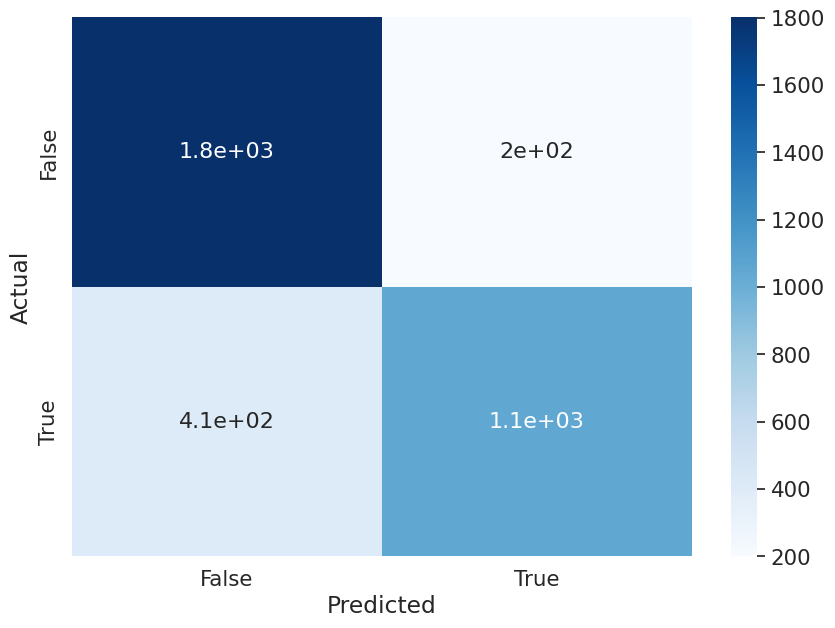

In [48]:
# generate confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


data = confusion_matrix(y_test_raw, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test_raw), index = np.unique(y_test_raw))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size

sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

plt.show()




In [38]:
print(classification_report(y_test_raw, y_pred))

              precision    recall  f1-score   support

       False       0.83      0.91      0.87      2001
        True       0.85      0.75      0.80      1463

    accuracy                           0.84      3464
   macro avg       0.84      0.83      0.83      3464
weighted avg       0.84      0.84      0.84      3464



In [39]:
# generate roc aoc score

from sklearn.metrics import roc_auc_score

roc_auc_score(y_test_raw, y_pred)


0.8282798108806156

NameError: name 'input_pca_first' is not defined

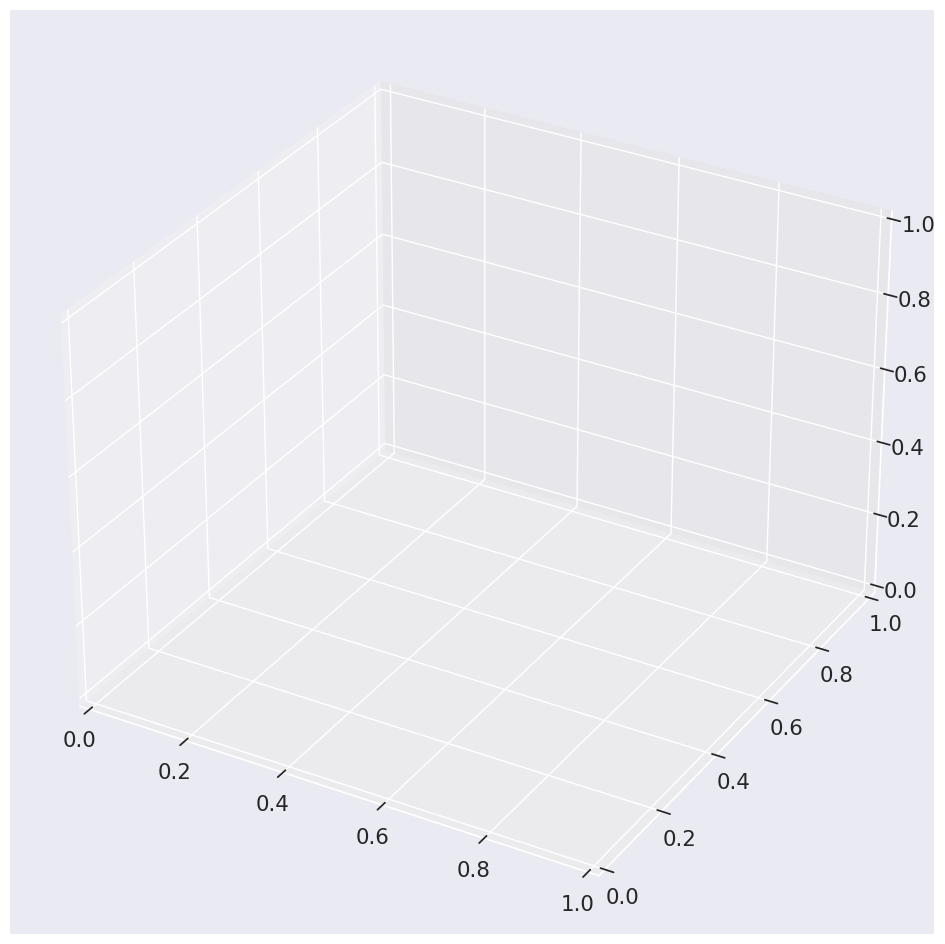

In [40]:
# 2d scatter plot

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(input_pca_first[:, 0], input_pca_first[:, 1], input_pca_first[:, 2], alpha=0.1, color="Blue")
ax.scatter(input_pca_second[:, 0], input_pca_second[:, 1], input_pca_second[:, 2], alpha=0.1, color="Orange")


plt.show()
